In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import itertools
import seaborn as sns 

In [ ]:
#Reading the dataset
df_Fake = pd.read_csv("Fake.csv")
df_True = pd.read_csv("True.csv")

In [ ]:
df_Fake.shape

(23481, 4)

In [ ]:
df_True.shape

(21417, 4)

#Data Cleaning

In [ ]:
# Add flag to track fake and real
df_Fake['target'] = 'fake'
df_True['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([df_Fake, df_True]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,REPORT: Donald Trump LIED About Donating To 9...,Donald Trump has called himself a patriot many...,News,"October 14, 2016",fake
1,Jimmy Kimmel Asks Trump Supporters To Say ONE...,"In the simplest of terms, one way to describe ...",News,"October 28, 2016",fake
2,Disabled Man Confronts Ted Cruz For His Lies ...,Republican presidential hopeful and Texas sena...,News,"May 1, 2016",fake
3,Highlights from Reuters' exclusive interview w...,(Reuters) - Below are the highlights from Reut...,politicsNews,"October 25, 2016",true
4,"TRUMP KICKS Pro-Amnesty, Globalist Koch Brothe...",President-elect Donald Trump told a critical b...,left-news,"Jan 2, 2017",fake


In [ ]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,REAL-TIME DEBATE Graph Shows Trump CRUSHED Hil...,This unbelievable graph should put the questio...,left-news,fake
1,OBAMA’S OPEN BORDERS: ILLEGAL ALIEN DEPORTED 1...,He was just looking to the jobs most Americans...,politics,fake
2,Death toll in attack on mosque in Egypt's nort...,CAIRO (Reuters) - The death toll in a militant...,worldnews,true
3,Trump's body language during debate raises soc...,NEW YORK (Reuters) - U.S. Republican presiden...,politicsNews,true
4,SWANKY NYC HOTEL TURNS AWAY NAVY OFFICER FOR W...,Because you can t take a chance that a sailor ...,left-news,fake


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,This unbelievable graph should put the questio...,left-news,fake
1,He was just looking to the jobs most Americans...,politics,fake
2,CAIRO (Reuters) - The death toll in a militant...,worldnews,true
3,NEW YORK (Reuters) - U.S. Republican presiden...,politicsNews,true
4,Because you can t take a chance that a sailor ...,left-news,fake


#Text Preprocessing

In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,this unbelievable graph should put the questio...,left-news,fake
1,he was just looking to the jobs most americans...,politics,fake
2,cairo (reuters) - the death toll in a militant...,worldnews,true
3,new york (reuters) - u.s. republican presiden...,politicsNews,true
4,because you can t take a chance that a sailor ...,left-news,fake


In [ ]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,unbelievable graph put question independent vo...,left-news,fake
1,looking jobs americans transformation america ...,politics,fake
2,cairo reuters death toll militant attack mosqu...,worldnews,true
3,new york reuters us republican presidential no...,politicsNews,true
4,take chance sailor uniform might offend antimi...,left-news,fake


#Basic Data Exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


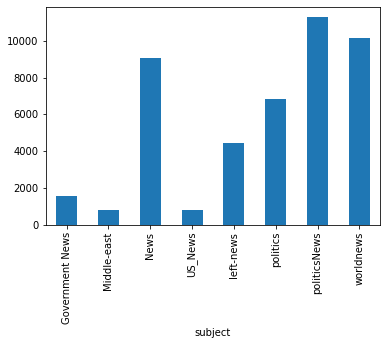

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


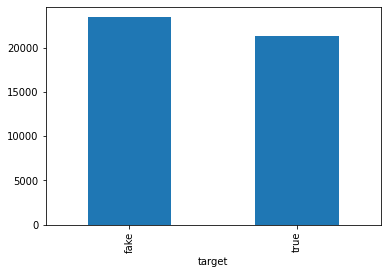

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

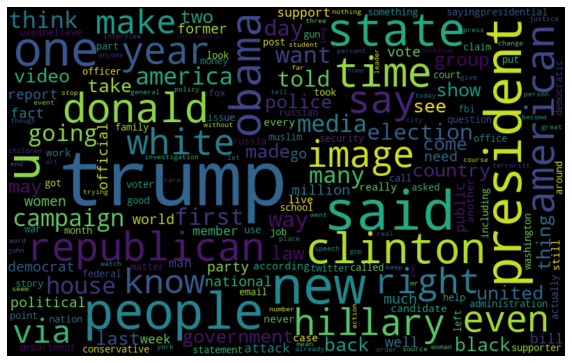

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

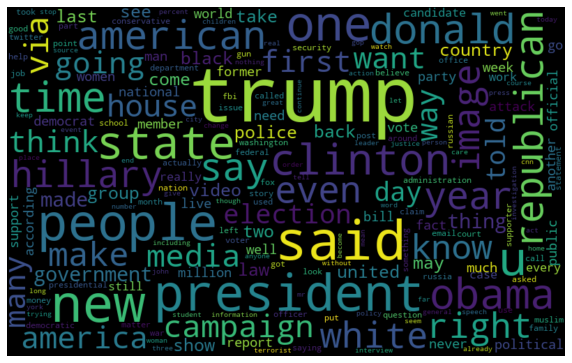

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Tokenizing
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space= tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

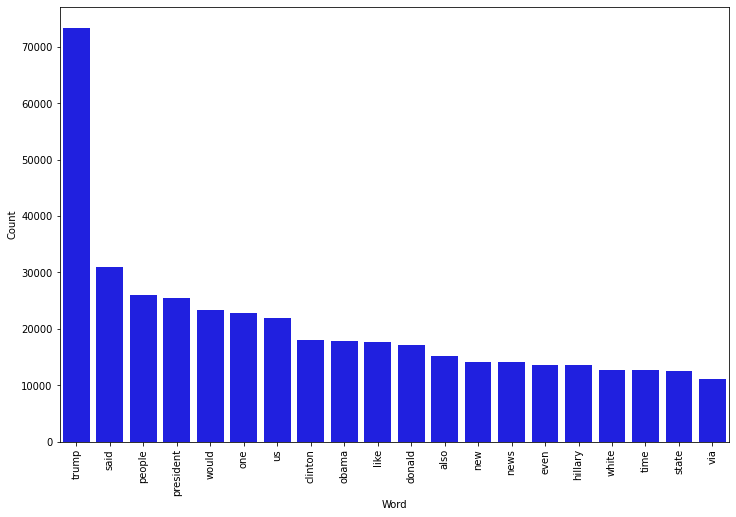

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

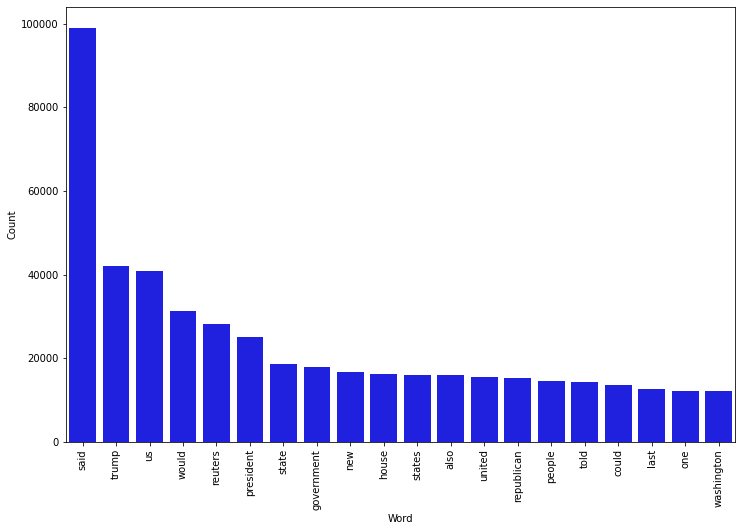

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)